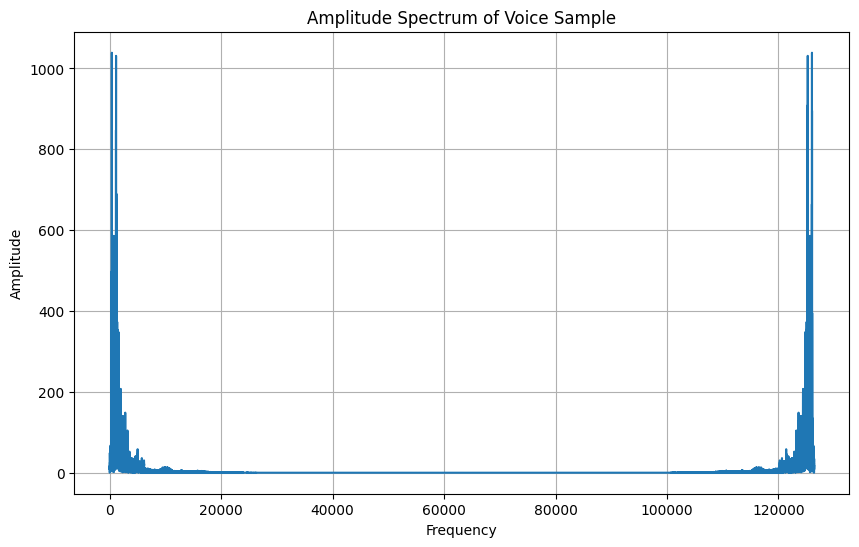

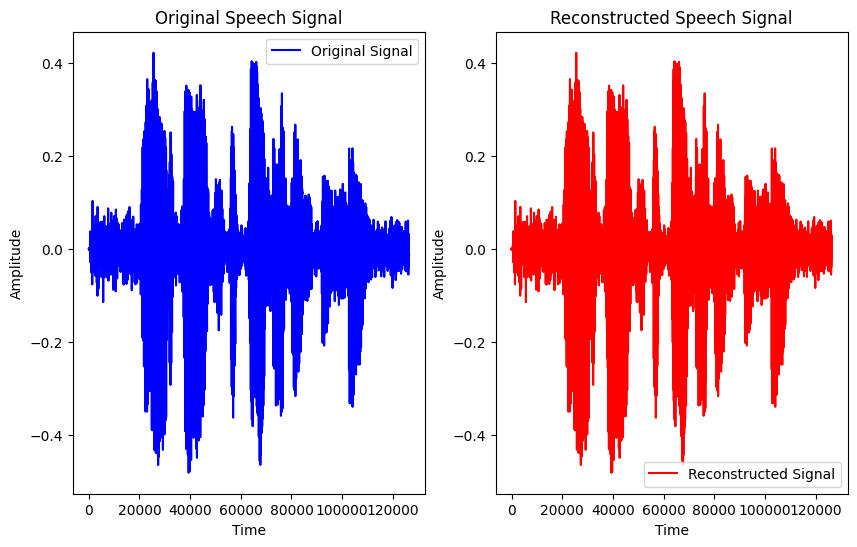

In [4]:
#A1
import numpy as np
import matplotlib.pyplot as plt
import librosa

# Load the audio file using librosa
y, sr = librosa.load('Lab5.wav', sr=None)

# Perform FFT
speech_fft = np.fft.fft(y)

# Calculate amplitude spectrum
amplitude_spectrum = np.abs(speech_fft)

# Plot the amplitude spectrum
plt.figure(figsize=(10, 6))
plt.plot(amplitude_spectrum)
plt.title('Amplitude Spectrum of Voice Sample')
plt.xlabel('Frequency')
plt.ylabel('Amplitude')
plt.grid(True)
plt.show()

# Perform inverse FFT to get the time domain signal
reconstructed_signal = np.fft.ifft(speech_fft)

# Plot original and reconstructed signals
plt.figure(figsize=(10, 6))

# Plot original signal
plt.subplot(1, 2, 1)
plt.plot(y, color='blue', label='Original Signal')
plt.title('Original Speech Signal')
plt.xlabel('Time')
plt.ylabel('Amplitude')
plt.legend()

# Plot reconstructed signal
plt.subplot(1, 2, 2)
plt.plot(np.real(reconstructed_signal), color='red', label='Reconstructed Signal')
plt.title('Reconstructed Speech Signal')
plt.xlabel('Time')
plt.ylabel('Amplitude')
plt.legend()

plt.show()


Low Pass Filtered Signal:


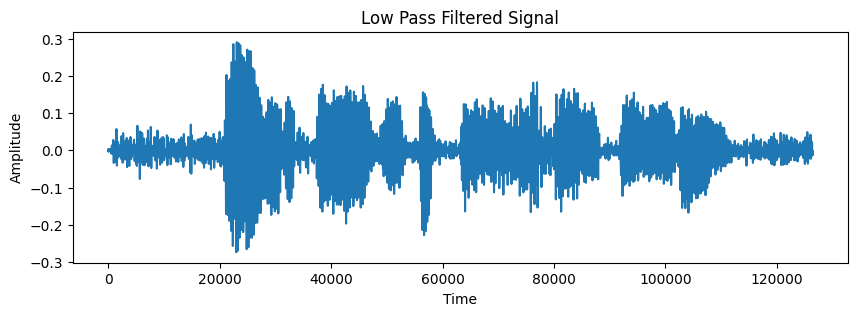

Band Pass Filtered Signal:


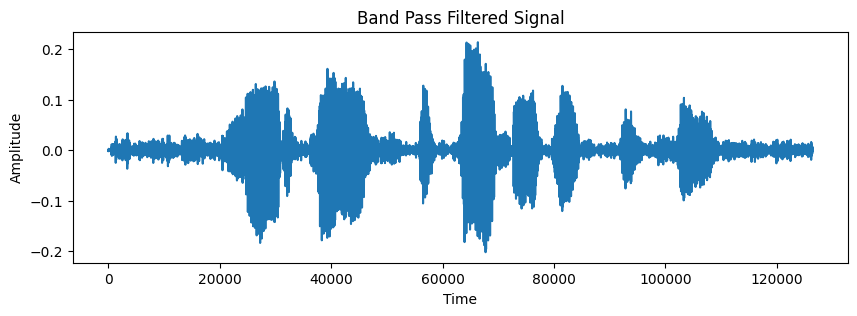

High Pass Filtered Signal:


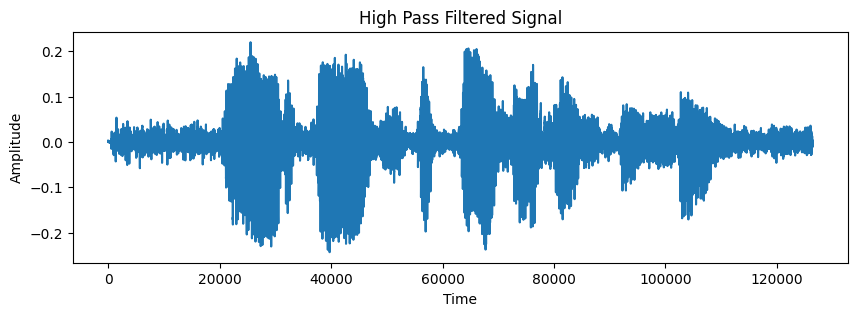

In [8]:
#A2
low_freq = 1000
high_freq = 3000

#rectangular window low pass
rectangular_window = np.zeros_like(speech_fft)
rectangular_window[:low_freq] = 1
rectangular_window[-low_freq:] = 1
filtered_spectrum_low = speech_fft * rectangular_window

#rectangular window band pass
rectangular_window_band = np.zeros_like(speech_fft)
rectangular_window_band[low_freq:high_freq] = 1
filtered_spectrum_band = speech_fft * rectangular_window_band

#rectangular window high pass
rectangular_window_high = np.zeros_like(speech_fft)
rectangular_window_high[high_freq:] = 1
filtered_spectrum_high = speech_fft * rectangular_window_high

# Inverse transform to time domain signals
filtered_signal_low = np.fft.ifft(filtered_spectrum_low)
filtered_signal_band = np.fft.ifft(filtered_spectrum_band)
filtered_signal_high = np.fft.ifft(filtered_spectrum_high)

print("Low Pass Filtered Signal:")
plt.figure(figsize=(10, 3))
plt.plot(np.real(filtered_signal_low))
plt.title('Low Pass Filtered Signal')
plt.xlabel('Time')
plt.ylabel('Amplitude')
plt.show()

print("Band Pass Filtered Signal:")
plt.figure(figsize=(10, 3))
plt.plot(np.real(filtered_signal_band))
plt.title('Band Pass Filtered Signal')
plt.xlabel('Time')
plt.ylabel('Amplitude')
plt.show()

print("High Pass Filtered Signal:")
plt.figure(figsize=(10, 3))
plt.plot(np.real(filtered_signal_high))
plt.title('High Pass Filtered Signal')
plt.xlabel('Time')
plt.ylabel('Amplitude')
plt.show()

Cosine Window Filtered Signal:


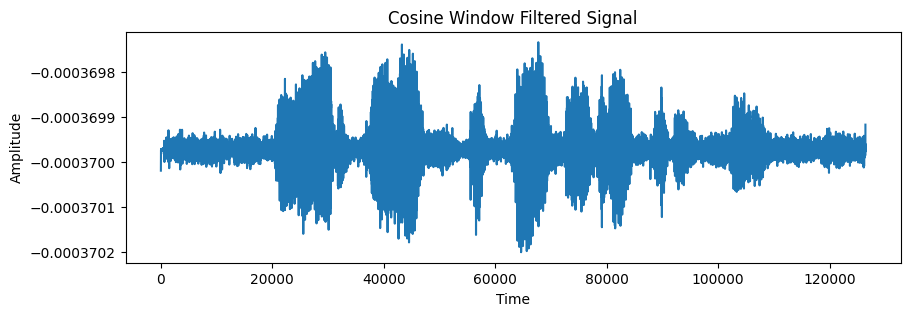

Gaussian Window Band Pass Filtered Signal:


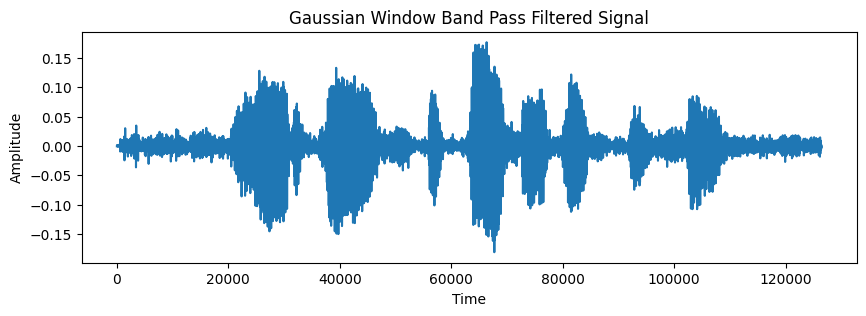

Gaussian Window High Pass Filtered Signal:


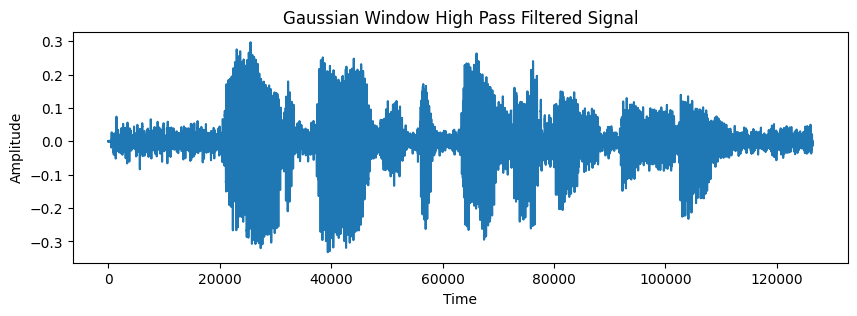

In [9]:
#A3
#cosine window low pass
cosine_window = np.cos(np.linspace(0, np.pi, len(speech_fft)))
filtered_spectrum_cosine_low = speech_fft * cosine_window

#Gaussian window band pass
gaussian_window = np.exp(-0.5 * ((np.arange(len(speech_fft)) - (low_freq + high_freq) / 2) / 1000)**2)
filtered_spectrum_gaussian_band = speech_fft * gaussian_window

#Gaussian window  high pass
filtered_spectrum_gaussian_high = speech_fft * (1 - gaussian_window)

# Inverse transform to time domain signals
filtered_signal_cosine_low = np.fft.ifft(filtered_spectrum_cosine_low)
filtered_signal_gaussian_band = np.fft.ifft(filtered_spectrum_gaussian_band)
filtered_signal_gaussian_high = np.fft.ifft(filtered_spectrum_gaussian_high)

print("Cosine Window Filtered Signal:")
plt.figure(figsize=(10, 3))
plt.plot(np.real(filtered_signal_cosine_low))
plt.title('Cosine Window Filtered Signal')
plt.xlabel('Time')
plt.ylabel('Amplitude')
plt.show()

print("Gaussian Window Band Pass Filtered Signal:")
plt.figure(figsize=(10, 3))
plt.plot(np.real(filtered_signal_gaussian_band))
plt.title('Gaussian Window Band Pass Filtered Signal')
plt.xlabel('Time')
plt.ylabel('Amplitude')
plt.show()

print("Gaussian Window High Pass Filtered Signal:")
plt.figure(figsize=(10, 3))
plt.plot(np.real(filtered_signal_gaussian_high))
plt.title('Gaussian Window High Pass Filtered Signal')
plt.xlabel('Time')
plt.ylabel('Amplitude')
plt.show()